In [52]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.stats import mode
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score

In [11]:
df = load_iris()

In [13]:
X = df.data
y = df.target

In [15]:
X.shape

(150, 4)

In [17]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [19]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Writing KNN from scratch

In [23]:
def KNN(X_train, y_train, x_test, k=1): 
    dist = np.linalg.norm(X_train - x_test, ord=2, axis=1)
    sorted_arg_dist = np.argsort(dist)
    y_nn = y_train[sorted_arg_dist[:k]]
    return mode(y_nn)[0]

In [25]:
y_pred = np.zeros(len(X_test))

for i in range(len(X_test)): 
    y_pred[i] = KNN(X_train, y_train, X_test[i], k=5)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#### Using sklearn

In [9]:
Knn = KNeighborsClassifier(n_neighbors = 5, algorithm='kd_tree', p=2) 

In [31]:
Knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree')

In [33]:
y_pred2 = Knn.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Regression task with KNN

In [44]:
df2 = pd.read_csv('advertising.csv')

In [48]:
df2.shape

(200, 4)

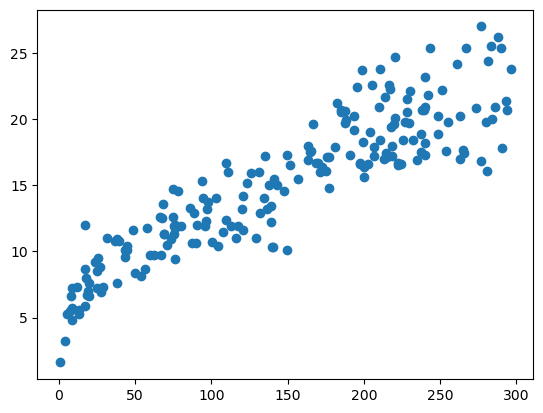

In [54]:
x = df2[['TV']].values
y = df2['Sales'].values

plt.scatter(x,y)


In [93]:
x = df2[['TV', 'Radio', 'Newspaper']].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

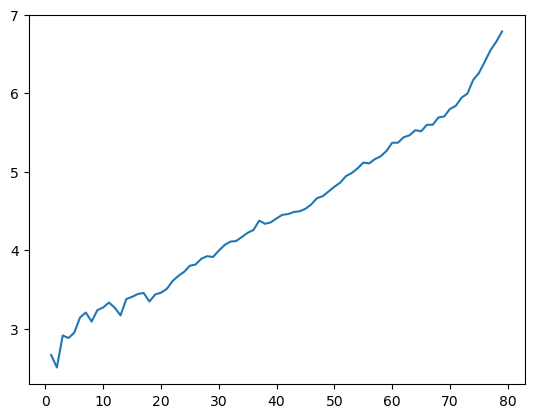

{1: 2.665666666666666,
 2: 2.5064583333333332,
 3: 2.9145925925925904,
 4: 2.8821770833333322,
 5: 2.949653333333333,
 6: 3.144157407407407,
 7: 3.2063775510204087,
 8: 3.091768229166666,
 9: 3.2381893004115225,
 10: 3.2714716666666663,
 11: 3.3344283746556482,
 12: 3.268694444444444,
 13: 3.169948717948719,
 14: 3.3789532312925172,
 15: 3.4066014814814825,
 16: 3.4435690104166663,
 17: 3.4562739331026524,
 18: 3.347545781893004,
 19: 3.437275623268698,
 20: 3.4597825000000006,
 21: 3.507889644746787,
 22: 3.6079645316804414,
 23: 3.673166036546944,
 24: 3.72579079861111,
 25: 3.803257599999999,
 26: 3.820077416173569,
 27: 3.8935921353452216,
 28: 3.925257653061223,
 29: 3.9151159334126016,
 30: 3.9957648148148124,
 31: 4.0674172736732555,
 32: 4.110615885416666,
 33: 4.118548209366391,
 34: 4.170167964244521,
 35: 4.223608435374148,
 36: 4.259381687242797,
 37: 4.37881373265157,
 38: 4.338177169898429,
 39: 4.356554788516324,
 40: 4.407404062499999,
 41: 4.452571386079713,
 42: 4.461

In [101]:
k_list = np.arange(1,80,1)
knn_dict = {}

for i in k_list: 
    knn = KNeighborsRegressor(n_neighbors = int(i))
    model_knn = knn.fit(x_train, y_train)
    y_knn_pred = model_knn.predict(x_test)
    mse = mean_squared_error(y_test, y_knn_pred)
    knn_dict[i] = mse

plt.plot(*zip(*sorted(knn_dict.items())))
plt.show()

knn_dict

In [107]:
knn = KNeighborsRegressor(n_neighbors = 2)
model_knn = knn.fit(x_train, y_train)
y_knn_pred = model_knn.predict(x_test)

In [109]:
r2_score(y_test, y_knn_pred)

0.9011343107357954